In [33]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import ptitprince
import os.path as op
import seaborn as sns
import os

In [34]:
report_path = '../reports/'

if op.join(report_path,'beta_correlations.csv') not in os.listdir(report_path):
    fpath = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/processed/ses-level_beta_maps_ICC.pkl'
    with open(fpath, 'rb') as f:
        datadict = pickle.load(f)

    condlist = np.unique(datadict['cond'])
    subjlist = np.unique(datadict['subj'])
    n_runs = len(datadict['fnames'])

    corr_r2 = []
    corr_cond = []
    corr_intera = []

    # Loop to get intra-subj R2
    for cond in condlist:
        for subj in subjlist:
            for i in range(n_runs):
                for j in range(n_runs):
                    if i<j:
                        if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                            if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                                corr_r2.append(datadict['corr_matrix'][i,j])
                                corr_cond.append(cond)
                                corr_intera.append('intra-subject')
                                

    # Loop to get inter-subj R2
    for cond in condlist:
        for subj in subjlist:
            for i in range(n_runs):
                for j in range(n_runs):
                    if i<j:
                        if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                            if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                                corr_r2.append(datadict['corr_matrix'][i,j])
                                corr_cond.append(cond)
                                corr_intera.append('inter-subject')


    # Loop to get intra-subj R2
    for cond in condlist:
        for subj in subjlist:
            for i in range(n_runs):
                for j in range(n_runs):
                    if i<j:
                        if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                            if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                                corr_r2.append(datadict['corr_matrix'][i,j])
                                corr_cond.append('Inter-annotations')
                                corr_intera.append('intra-subject')
                                

    # Loop to get inter-subj R2
    for cond in condlist:
        for subj in subjlist:
            for i in range(n_runs):
                for j in range(n_runs):
                    if i<j:
                        if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                            if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                                corr_r2.append(datadict['corr_matrix'][i,j])
                                corr_cond.append('Inter-annotations')
                                corr_intera.append('inter-subject')

    plot_df = pd.DataFrame({'r2':corr_r2,
                            'event': corr_cond,
                            'comparison': corr_intera})

    plot_df.to_csv(op.join(report_path,'beta_correlations.csv'))
    plot_df.groupby(['comparison', 'event']).describe().to_csv(op.join(report_path,'beta_correlations.csv'))

else:
    plot_df = pd.read_csv('../reports/beta_correlations.csv')

"\n# Build the pairs\npairs = []\n#pairs.append(('intra-subject','inter-subject'))\nfor comp in np.unique(plot_df.comparison):\n    for event in np.unique(plot_df.event):\n        if event != 'Inter-annotations':\n            pairs.append(((comp, event), (comp, 'Inter-annotations')))\n\nannotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue)#, hue_order=hue_order)\n#ttest_ind = scipy.stats.ttest_ind()\nannotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='bonf')\nannotator.apply_and_annotate()\n"

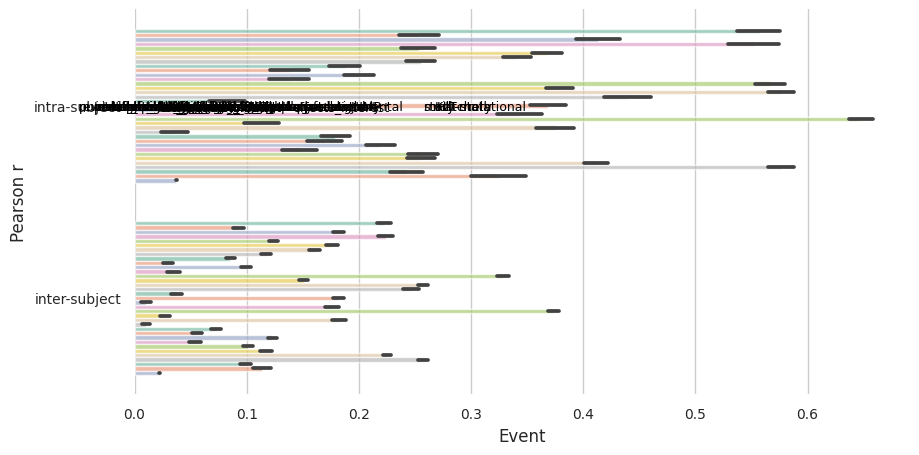

In [51]:
from statannotations.Annotator import Annotator
import scipy

dx="r2"; dy="comparison"; dhue = "event"; ort="h"; pal = "Set2"; sigma = .15
#hue_order = ['Inter-annotations', 'JUMP', 'HIT', 'HealthLoss', 'Kill']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.barplot(x = dx, y = dy, hue = dhue, 
               #hue_order=hue_order,
               data = plot_df, palette = pal, #bw = sigma,
               ax = ax, orient = ort, alpha = .65)#, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



'''
# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
for comp in np.unique(plot_df.comparison):
    for event in np.unique(plot_df.event):
        if event != 'Inter-annotations':
            pairs.append(((comp, event), (comp, 'Inter-annotations')))

annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue)#, hue_order=hue_order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='bonf')
annotator.apply_and_annotate()
'''

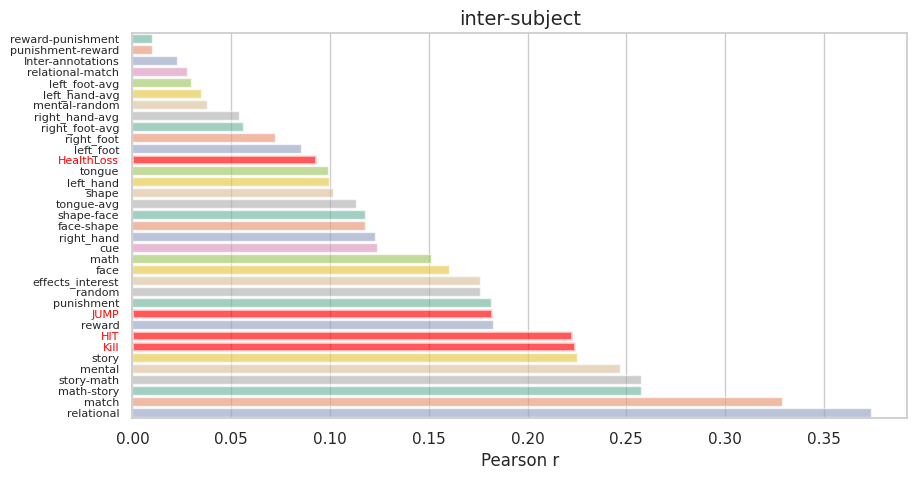

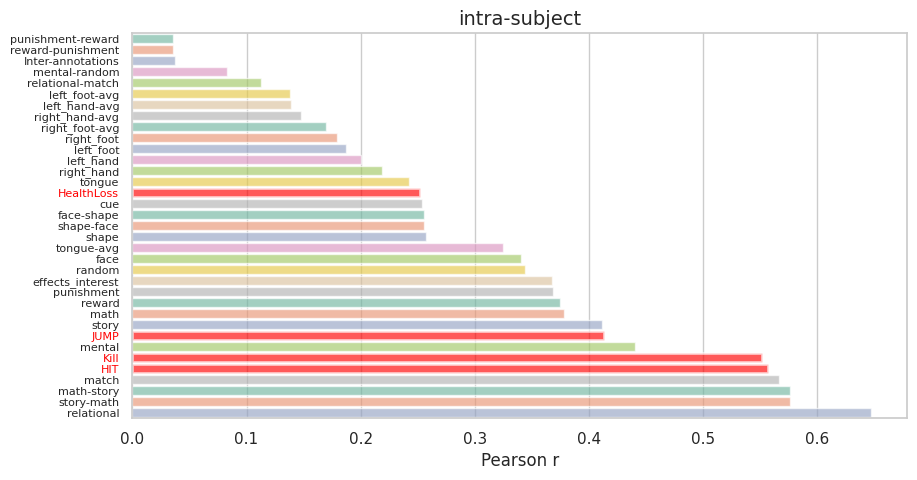

In [76]:



dx="r2"; dhue = "event"; ort="h"; pal = "Set2"; sigma = .15
for comp in np.unique(plot_df.comparison):
    comp_df = plot_df[plot_df['comparison'] == comp].drop(columns='comparison')
    # sort by mean
    
    comp_df = comp_df.groupby('event').mean().sort_values(by='r2')

    # make index a column
    comp_df = comp_df.reset_index()
    f, ax = plt.subplots(figsize=(10,5))
    sns.barplot(x = dx, y=dhue, data = comp_df, palette = pal, alpha = .65)
    # make y label size smaller
    ax.set_xlabel('Pearson r', fontsize=12)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 8)
    # Make the Kill, HIT, JUMP and HealthLoss in bold and red
    for i, event in enumerate(comp_df['event']):
        if event in ['Kill', 'HIT', 'JUMP', 'HealthLoss']:
            ax.get_children()[i].set_facecolor('red')
            ax.get_children()[i].set_linewidth(2)
            ax.get_yticklabels()[i].set_color('red')
    # Remove y label
    ax.set_ylabel('')

    # Set plot title
    ax.set_title(comp, fontsize=14)
    plt.show()

In [60]:
np.unique(plot_df.event)

array(['HIT', 'HealthLoss', 'Inter-annotations', 'JUMP', 'Kill', 'cue',
       'effects_interest', 'face', 'face-shape', 'left_foot',
       'left_foot-avg', 'left_hand', 'left_hand-avg', 'match', 'math',
       'math-story', 'mental', 'mental-random', 'punishment',
       'punishment-reward', 'random', 'relational', 'relational-match',
       'reward', 'reward-punishment', 'right_foot', 'right_foot-avg',
       'right_hand', 'right_hand-avg', 'shape', 'shape-face', 'story',
       'story-math', 'tongue', 'tongue-avg'], dtype=object)

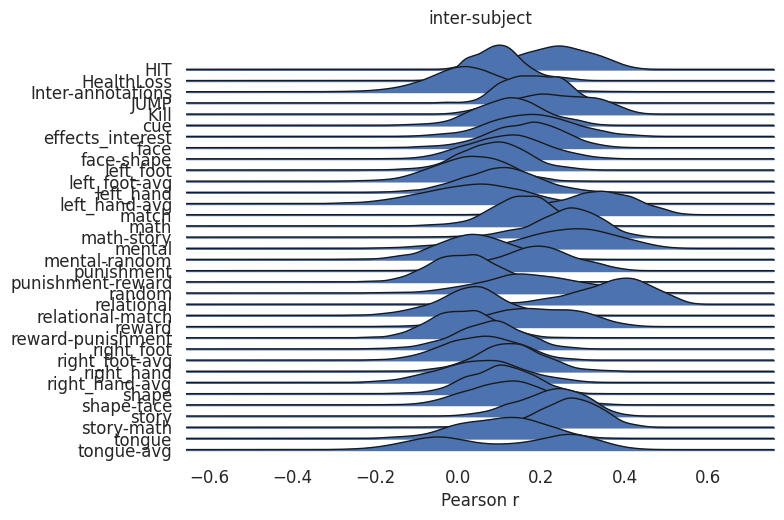

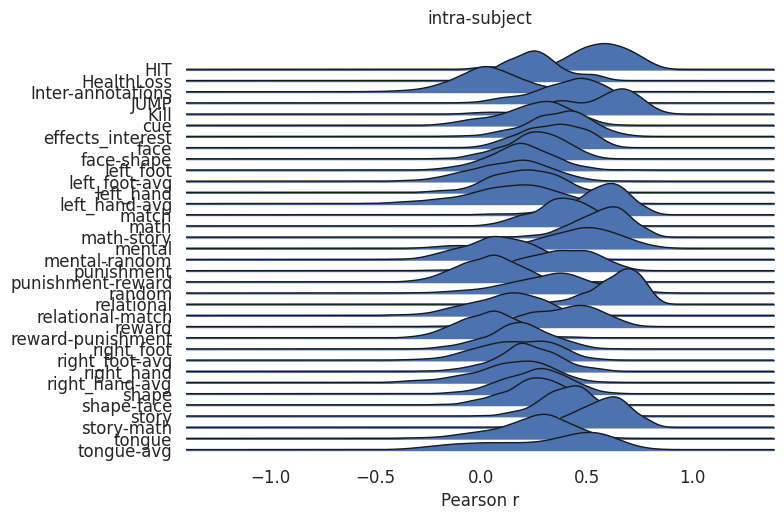

In [43]:
import joypy

for comp in np.unique(plot_df.comparison):
    fig, axes = joypy.joyplot(plot_df[plot_df.comparison == comp], by="event", column="r2", figsize=(8, 5), legend=False, overlap=0.5, linewidth=1)
    plt.title(comp)
    plt.xlabel('Pearson r')
    plt.ylabel('Event')
    plt.yticks(fontsize=6)  # Make the event names font twice smaller
    plt.show()
    fig.savefig(op.join(report_path,'beta_correlations_{}.png'.format(comp)))

In [47]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7fe2c41cdaf0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variab

In [22]:
# Extract colors for each dhue name
dhue_colors = {label: bar.get_facecolor() for label, bar in zip(plot_df[dhue].unique(), bars.patches[:len(plot_df[dhue].unique())])}
print(dhue_colors)

{'HIT': (0.44509803921568625, 0.7156862745098038, 0.6303921568627451, 0.65), 'HealthLoss': (0.44509803921568625, 0.7156862745098038, 0.6303921568627451, 0.65), 'JUMP': (0.9127450980392158, 0.5862745098039216, 0.45980392156862737, 0.65), 'Kill': (0.9127450980392158, 0.5862745098039216, 0.45980392156862737, 0.65), 'cue': (0.5833333333333334, 0.6392156862745098, 0.765686274509804, 0.65), 'effects_interest': (0.5833333333333334, 0.6392156862745098, 0.765686274509804, 0.65), 'face': (0.8602941176470587, 0.5867647058823531, 0.7544117647058823, 0.65), 'face-shape': (0.8602941176470587, 0.5867647058823531, 0.7544117647058823, 0.65), 'left_foot': (0.6352941176470588, 0.7823529411764706, 0.3941176470588236, 0.65), 'left_foot-avg': (0.6352941176470588, 0.7823529411764706, 0.3941176470588236, 0.65), 'left_hand': (0.8980392156862746, 0.7862745098039216, 0.28627450980392144, 0.65), 'left_hand-avg': (0.8980392156862746, 0.7862745098039216, 0.28627450980392144, 0.65), 'match': (0.8583333333333332, 0.7

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject')), (('cue', 'inter-subject'), ('cue', 'intra-subject')), (('effects_interest', 'inter-subject'), ('effects_interest', 'intra-subject')), (('face', 'inter-subject'), ('face', 'intra-subject')), (('face-shape', 'inter-subject'), ('face-shape', 'intra-subject')), (('left_foot', 'inter-subject'), ('left_foot', 'intra-subject')), (('left_foot-avg', 'inter-subject'), ('left_foot-avg', 'intra-subject')), (('left_hand', 'inter-subject'), ('left_hand', 'intra-subject')), (('left_hand-avg', 'inter-subject'), ('left_hand-avg', 'intra-subject')), (('match', 'inter-subject'), ('match', 'intra-subject')), (('math', 'inter-subject'), ('math', 'intra-subject')), (('math-story', 'inter-subject'), ('math-story', 'intra-subject')), (('mental', 'inter-subject'), ('mental', 'int

KeyError: ('cue', 'inter-subject')

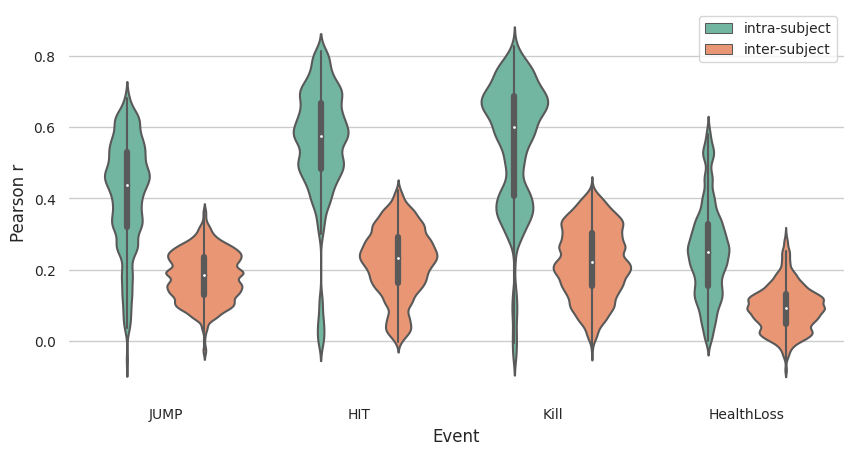

In [8]:
from statannotations.Annotator import Annotator
import scipy

dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, hue = dhue, 
               order=order,
               data = plot_df, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject')), (('cue', 'inter-subject'), ('cue', 'intra-subject')), (('effects_interest', 'inter-subject'), ('effects_interest', 'intra-subject')), (('face', 'inter-subject'), ('face', 'intra-subject')), (('face-shape', 'inter-subject'), ('face-shape', 'intra-subject')), (('left_foot', 'inter-subject'), ('left_foot', 'intra-subject')), (('left_foot-avg', 'inter-subject'), ('left_foot-avg', 'intra-subject')), (('left_hand', 'inter-subject'), ('left_hand', 'intra-subject')), (('left_hand-avg', 'inter-subject'), ('left_hand-avg', 'intra-subject')), (('match', 'inter-subject'), ('match', 'intra-subject')), (('math', 'inter-subject'), ('math', 'intra-subject')), (('math-story', 'inter-subject'), ('math-story', 'intra-subject')), (('mental', 'inter-subject'), ('mental', 'int

KeyError: ('cue', 'inter-subject')

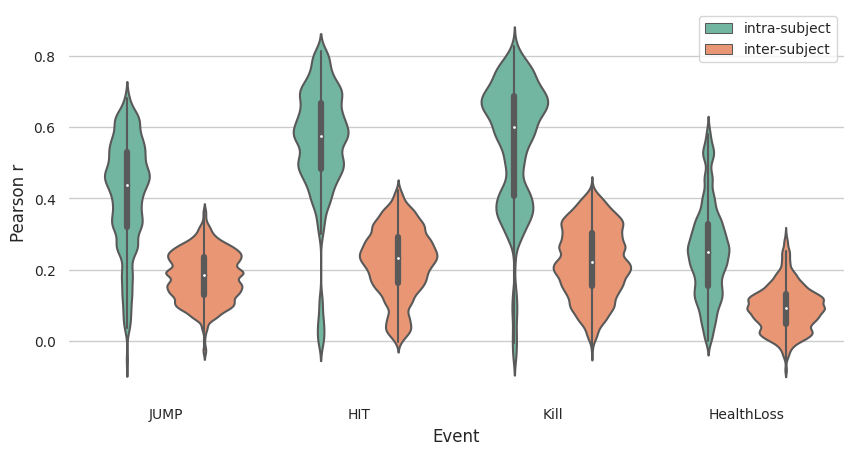

In [26]:
from statannotations.Annotator import Annotator
import scipy

dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, hue = dhue, 
               order=order,
               data = plot_df, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate()


In [4]:
plot_df_intra = plot_df[plot_df.comparison == 'intra-subject']
plot_df_inter = plot_df[plot_df.comparison == 'inter-subject']

,r2,event,comparison
0,0.661470,HIT,intra-subject
1,-0.004476,HIT,intra-subject
2,0.735708,HIT,intra-subject
3,0.414770,HIT,intra-subject
4,0.639137,HIT,intra-subject
...,...,...,...
15748,0.092798,Inter-annotations,inter-subject
15749,0.137961,Inter-annotations,inter-subject
15750,-0.000654,Inter-annotations,inter-subject
15751,0.192476,Inter-annotations,inter-subject


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid 

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


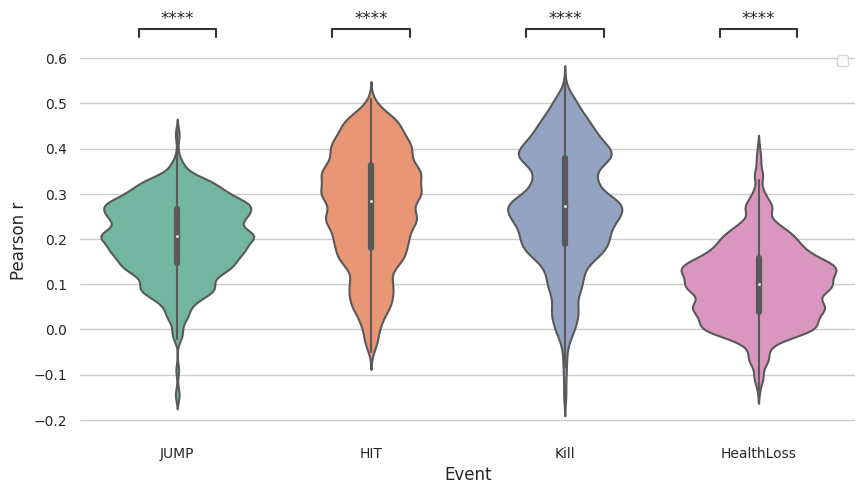

In [7]:
### Split version
## Inter

from statannotations.Annotator import Annotator
import scipy


dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, 
               order=order,
               data = plot_df_inter, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid 

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


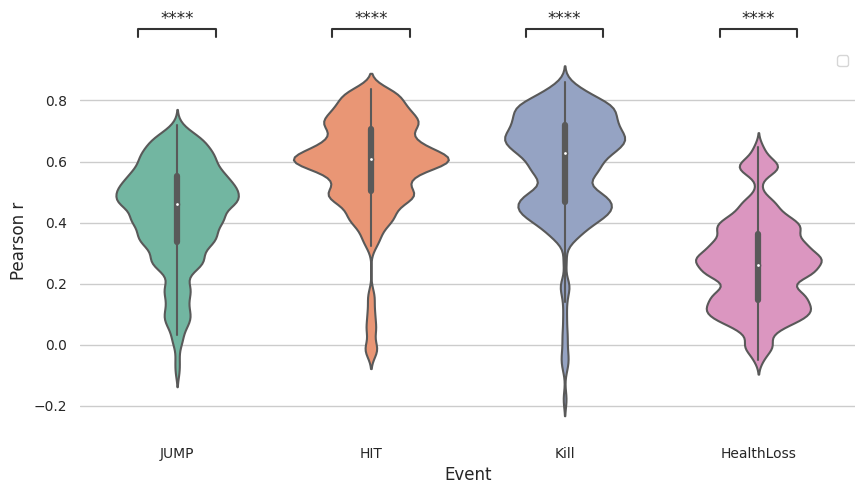

In [8]:
### Split version
## Intra

from statannotations.Annotator import Annotator
import scipy


dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, 
               order=order,
               data = plot_df_intra, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


Text(0, 0.5, 'Pearson r')

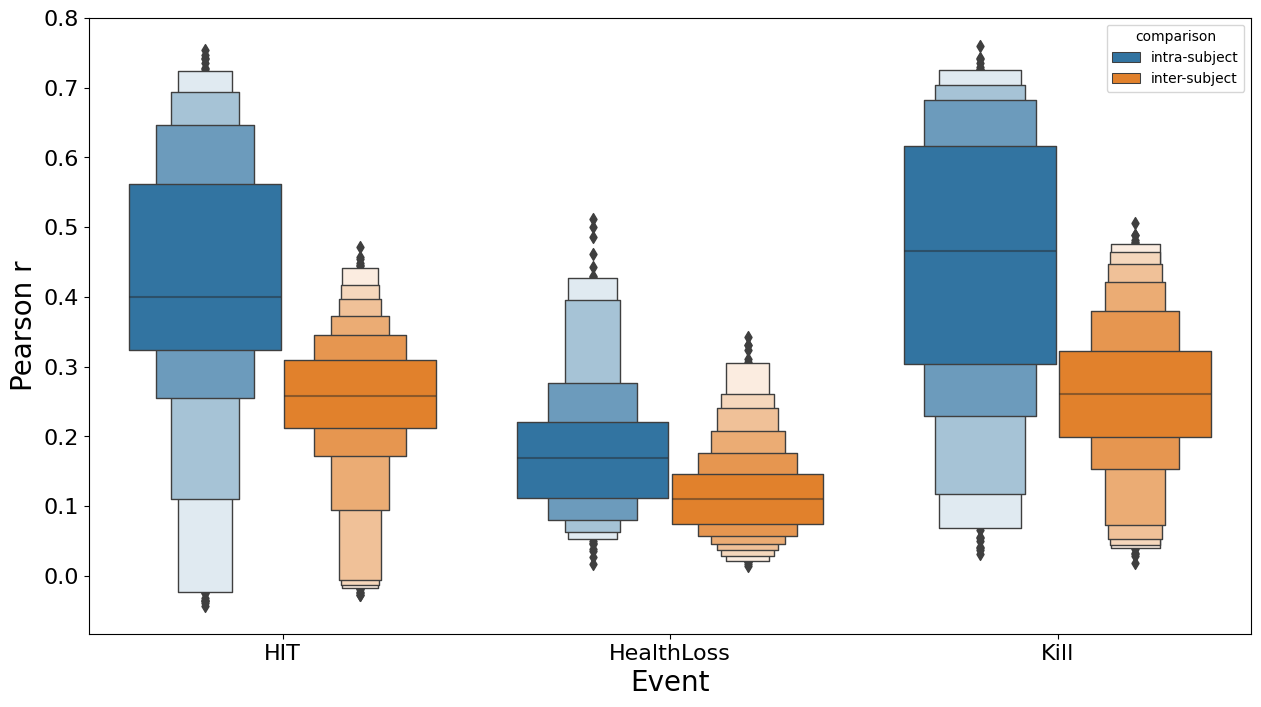

In [9]:
import seaborn as sbn
fig, ax = plt.subplots(figsize=(15,8))
sbn.boxenplot(data=plot_df, x='event', y='r2', hue='comparison', scale='area')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_xlabel('Event', fontsize=20)
ax.set_ylabel('Pearson r', fontsize=20)

/home/hyruuk/mambaforge/envs/shinobi2/lib/python3.8/site-packages/ptitprince/PtitPrince.py:64: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  for h in self.plot_hues[i]], np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

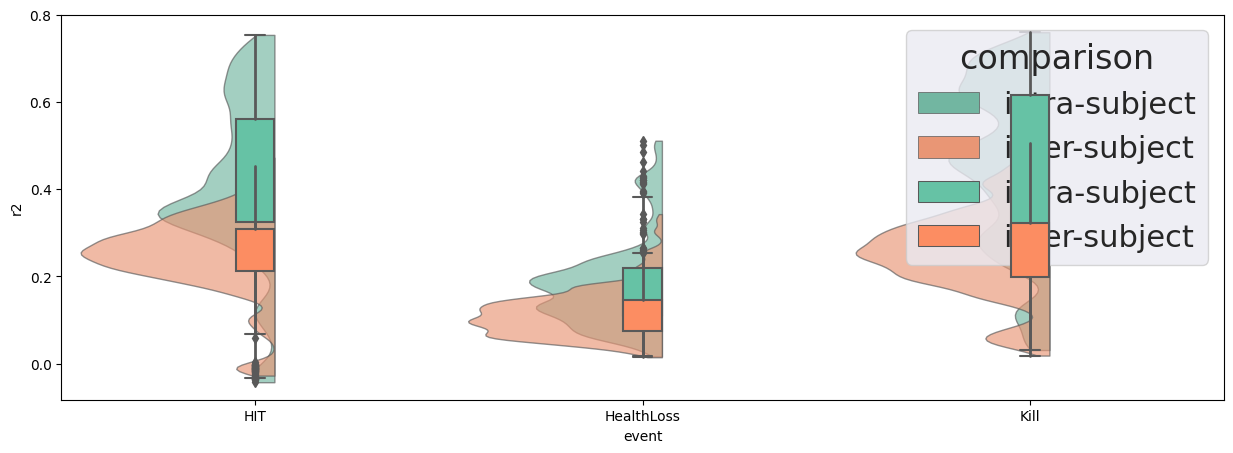